# Levenberg-Maquardt

In [31]:
include("algorithm.jl")
include("test-algorithms.jl")

cleaning

In [2]:
?levenberg_maquardt

search: levenberg_maquardt



Goal: computes an approximate solution to the problem using the Levenberg Maquardt method

#### Input:

```
A - data matrix
f - model function
t - initial estimation
dp- type of damping parameter(fixed number, DP1, DP2, DP3, DP4, DP5) 
ϵ(optional - 1.0e-9) - precision
itmax(optional - 1000) - maximum of iterations
```

#### Output:

```
t - approximate solution
k - number of iteractions
```


## Testes unitários

Podemos aplicar o método de Levenberg-Maquardt em diversos tipos de funções. Separamos algumas para testarmos individualmente. 

Em cada um dos 4 tipos de funções: quadrática, cúbica, logarítmica e gaussiana, vamos aplicar o método diretamente que nos retorna uma solução aproximada e o número de iterações. Além disso, usaremos um programa para limpar a matriz de entrada a partir da solução do problema, apenas com intuito de testar a eficácia do método em problemas sem perturbação.

Por fim, traçaremos o gráfico de cada uma delas levando em consideração os dados da matriz de entrada e a aproximação calculada pelo método.

### 1 - Função Quadrática

In [3]:
sample_test = sample_parsing("./problems/parabola/parabola_-9.5_-8.5_2.5_350_56.csv")

name = sample_test.name
A = sample_test.data
n = sample_test.n
dim = sample_test.dim
func = sample_test.model
sol = sample_test.solution

3-element Vector{Float64}:
 -9.5
 -8.5
  2.5

Calculemos a solução aproximada pelo método.

In [5]:
aprox_solution, k = levenberg_maquardt(A, func, [1.0, 0, 0], "DP3")

([-1.6568542576424423, -6.081377514030682, 0.14209443719315357], 14)

Usamos o programa para tirar a perturbação da matriz de dados e aplicamos no método. Com isso, naturalmente,  obtemos uma solução melhor para o problema e consideravelmente próxima da solução dada.

In [6]:
M = cleaning(A, sol, func)
aprox_solution, k = levenberg_maquardt(M, func, [1.0, 0, 0], "DP1")

([-9.499999999996296, -8.499999999999902, 2.4999999999985967], 73)

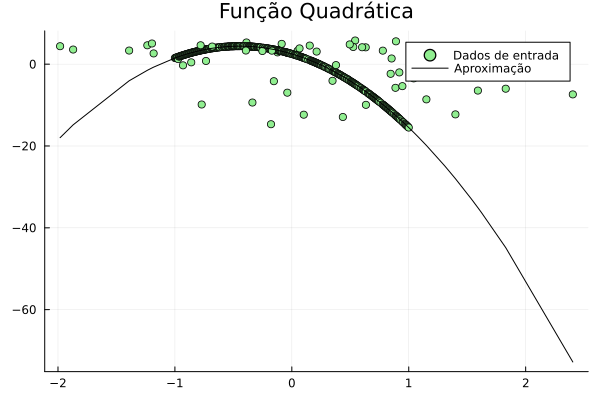

In [7]:
plotting(A, aprox_solution, "Função Quadrática")

### 2 - Função Cúbica

In [10]:
sample_test = sample_parsing("./problems/cubic/cubic_0.0_5.0_-10.0_-6.0_250_48.csv")

name = sample_test.name
A = sample_test.data
n = sample_test.n
dim = sample_test.dim
func = sample_test.model
sol = sample_test.solution

4-element Vector{Float64}:
   0.0
   5.0
 -10.0
  -6.0

In [11]:
aprox_solution, k = levenberg_maquardt(A, func, [1.0, 0, 0, 0], "DP3")

([-0.05174233583424519, 3.973079726078183, -9.465563034322306, -3.4345668730037167], 24)

In [13]:
M = cleaning(A, sol, func)
aprox_solution, k = levenberg_maquardt(M, func, [1.0, 0, 0, 0], 0.5)

([-4.131990101621886e-14, 4.999999999999942, -9.999999999999737, -5.999999999999695], 6)

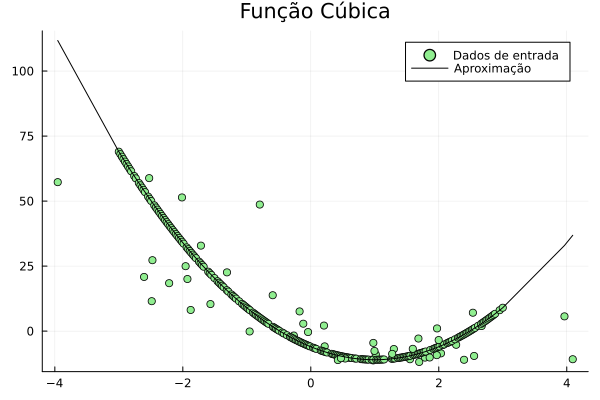

In [14]:
plotting(A, aprox_solution, "Função Cúbica")

### 3 - Função Logarítmica

In [16]:
sample_test = sample_parsing("./problems/log/log_1.0_2.5_-5.5_350_25.csv")

name = sample_test.name
A = sample_test.data
n = sample_test.n
dim = sample_test.dim
func = sample_test.model
sol = sample_test.solution

3-element Vector{Float64}:
  1.0
  2.5
 -5.5

In [19]:
aprox_solution, k = levenberg_maquardt(A, func, [1.0, 2.5, -5.5], "DP3")

([0.7820951342907115, 3.9543942632171953, -8.682717996762635], 1000)

In [21]:
aprox_solution, k = levenberg_maquardt(A, func, [1.0, 100, -7], "DP3")

([0.25256064984960197, 389.60509085462496, -27.347380648441096], 1000)

In [22]:
M = cleaning(A, sol, func)
aprox_solution, k = levenberg_maquardt(M, func, [1.0, 10, 10], 0.5)

([0.24452775111836353, 298.18130408602065, 274.12277912016356], 1000)

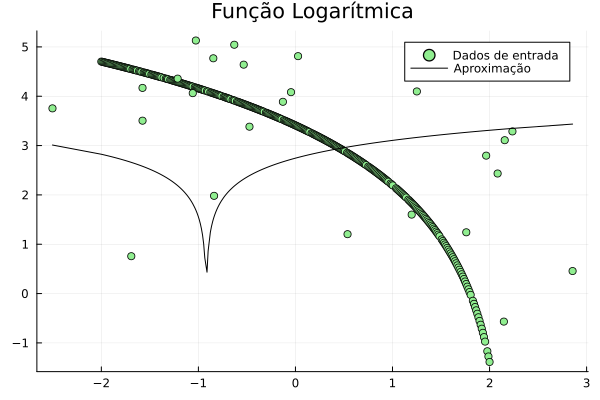

In [23]:
plotting(A, aprox_solution, "Função Logarítmica")

### 4 - Função Gaussiana

Apliquemos o método em uma função gaussiana.

In [24]:
sample_test = sample_parsing("./problems/gaussian/gaussian_-4.5_-3.0_-7.0_300_18.csv")
name = sample_test.name
A = sample_test.data
n = sample_test.n
dim = sample_test.dim
func = sample_test.model
sol = sample_test.solution

3-element Vector{Float64}:
 -4.5
 -3.0
 -7.0

In [25]:
aprox_solution, k = levenberg_maquardt(A, func, [1.0, 10, 10], "DP3")

([-4.5002541578888495, -2.9811728334077654, 7.080239324310123], 62)

In [26]:
M = cleaning(A, sol, func)
aprox_solution, k = levenberg_maquardt(M, func, [1.0, 10, 10], 0.5)

([-4.500000000012188, -3.000000000073553, 7.000000000092904], 76)

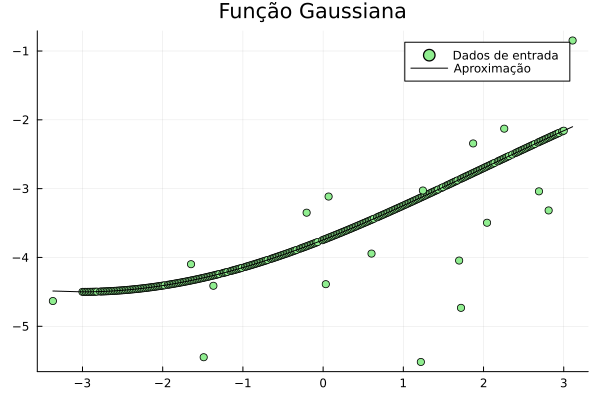

In [27]:
plotting(A, aprox_solution, "Função Gaussiana")

## Testes gerais

Podemos também aplicar o método em um conjunto de problemas. Novamente, dividimos os problemas em quatro tipos, quadráticas(262 problemas), cúbicas(252 problemas), logarítmicas(250 problemas) e gaussiana(250 problemas). Assim, podemos avaliar a média de iterações e de erro na solução de cada um dos tipos de função em cada um dos seis Parâmetros de Damping propostos.

O algoritmo retorna uma média do número de iterações e do erro para cada parâmetro sendo

  $$DP1 = \frac{||J(x_k)^T R(x_k)||^{2}_{2}}{f(xk)}$$
  $$DP2 = ||J(x_k)^T R(x_k)||^{2}_{2}$$                 
  $$DP3 = ||J(x_k)^T R(x_k)||_{2}$$                   
  $$DP4 = ||R(x_k)||^{2}_{2} = 2f(x)$$                 
  $$DP5 = ||R(x_k)||_{2} = \sqrt{2f(x)}$$         
  $$valor fixado.$$
  

### 1 - Função Quadrática

Na análise da função quadrática tomamos o ponto inicial $x_0 = (0, 0, 0).$ Foi possível perceber que para os parâmetros DP1, DP2, DP3, DP5 e 0.5 como valor fixado foi possível encontrar soluções com baixa taxa de erro. Vale a pena destacar que o parâmetro DP1 obteve esse resultado com uma média de apenas 10.4 iterações, sendo o mais eficiente.

In [32]:
#os testes foram feitos com apenas 10 arquivos por falta de capacidade do computador usado
#caso desejado, o número pode ser removido, então o programa usará todos os arquivos do modelo 
#allfiles("parabola", [0.0, 0, 0], "DP1")

allfiles("parabola", [0.0, 0, 0], "DP1", 10)

Número médio de iterações o cada parâmetro: 10.4
Valor médio do erro para o parâmetro: 0.6782549528896625


In [33]:
allfiles("parabola", [0.0, 0, 0], "DP2", 10)

Número médio de iterações o cada parâmetro: 1000.0
Valor médio do erro para o parâmetro: 8.435057094719788


In [34]:
allfiles("parabola", [0.0, 0, 0], "DP3", 10)

Número médio de iterações o cada parâmetro: 18.0
Valor médio do erro para o parâmetro: 0.6782549528896633


In [35]:
allfiles("parabola", [0.0, 0, 0], "DP4", 10)

Número médio de iterações o cada parâmetro: 684.6
Valor médio do erro para o parâmetro: 0.6782549522201105


In [36]:
allfiles("parabola", [0.0, 0, 0], "DP5", 10)

Número médio de iterações o cada parâmetro: 411.5
Valor médio do erro para o parâmetro: 0.6782549528874264


In [37]:
 allfiles("parabola", [0.0, 0, 0], 0.5, 10)

Número médio de iterações o cada parâmetro: 105.3
Valor médio do erro para o parâmetro: 0.6782549528896331


### 2 - Função Cúbica

Tomando novamente $x_0 = (0, 0, 0)$ obtivemos um resultado semelhante ao das funções quadráticas, apenas com uma taxa de erro maior. Outra vez, o parâmetro DP1 obteve o mesmo resultado em um número menor de iterações, sendo apenas 9.3 a média.

In [38]:
allfiles("cubic", [0.0, 0, 0, 0], "DP1", 10)

Número médio de iterações o cada parâmetro: 9.3
Valor médio do erro para o parâmetro: 4.414982901543739


In [39]:
allfiles("cubic", [0.0, 0, 0, 0], "DP2", 10) 

Número médio de iterações o cada parâmetro: 1000.0
Valor médio do erro para o parâmetro: 8.866438360150811


In [40]:
allfiles("cubic", [0.0, 0, 0, 0], "DP3", 10) 

Número médio de iterações o cada parâmetro: 21.9
Valor médio do erro para o parâmetro: 4.414982901543752


In [41]:
allfiles("cubic", [0.0, 0, 0, 0], "DP4", 10) 

Número médio de iterações o cada parâmetro: 845.3
Valor médio do erro para o parâmetro: 4.25307760085675


In [42]:
allfiles("cubic", [0.0, 0, 0, 0], "DP5", 10) 

Número médio de iterações o cada parâmetro: 322.0
Valor médio do erro para o parâmetro: 4.414982901525795


In [43]:
allfiles("cubic", [0.0, 0, 0, 0], 0.5, 10) 

Número médio de iterações o cada parâmetro: 6.0
Valor médio do erro para o parâmetro: 4.414982901543708


### 3 - Função Logarítmica

O ponto inicial considerado foi $x_0 = (1, 10, 10).$ A função logarítmica obteve resultado com um número bem maior de iterações. Contudo, mais uma vez, o parâmetro DP1 foi o que obteve maior sucesso, e o que vale destacar foi a média do erro, que foi bem menor comparado aos outros parâmetros.

In [51]:
allfiles("log", [1.0, 10, 10], "DP1", 10)

Número médio de iterações o cada parâmetro: 627.8
Valor médio do erro para o parâmetro: 6.698343243828645e10


In [52]:
allfiles("log", [1.0, 10, 10], "DP2", 10)

Número médio de iterações o cada parâmetro: 900.0
Valor médio do erro para o parâmetro: 17.361762898297208


In [53]:
allfiles("log", [1.0, 10, 10], "DP3", 10)

Número médio de iterações o cada parâmetro: 820.6
Valor médio do erro para o parâmetro: 160.82914795021492


In [54]:
allfiles("log", [1.0, 10, 10], "DP4", 10)

Número médio de iterações o cada parâmetro: 900.0
Valor médio do erro para o parâmetro: 19.785973200847703


In [55]:
allfiles("log", [1.0, 10, 10], "DP5", 10)

Número médio de iterações o cada parâmetro: 816.1
Valor médio do erro para o parâmetro: 45.78331436709195


In [56]:
allfiles("log", [1.0, 10, 10], 0.5, 10)

Número médio de iterações o cada parâmetro: 740.5
Valor médio do erro para o parâmetro: 11.307391561937285


### 4 - Função Gaussiana

Aqui utilizamos o ponto de entrada $x_0 = (1, 10, 10).$ A função gaussiana obteve o melhor resultado para o parâmetro fixado como $0.5,$ apesar de não ter sido o menor número de iterações, foi encontrado uma média de erro melhor comparado aos outros parâmetros. Percebemos também que para os parâmetros DP4 e DP5 atingimos o número máximo de iterações, apesar disso, ele ainda obteve um erro menor que o encontrado em DP3.

In [44]:
allfiles("gaussian", [1.0, 10, 10], "DP3", 10)

Número médio de iterações o cada parâmetro: 446.0
Valor médio do erro para o parâmetro: 80.50623508335747


In [45]:
allfiles("gaussian",  [1.0, 10, 10], "DP4", 10)

Número médio de iterações o cada parâmetro: 1000.0
Valor médio do erro para o parâmetro: 15.07986544497781


In [46]:
allfiles("gaussian", [1.0, 10, 10], "DP5", 10)

Número médio de iterações o cada parâmetro: 1000.0
Valor médio do erro para o parâmetro: 13.454324316844254


In [47]:
allfiles("gaussian", [1.0, 10, 10], 0.5, 10)

Número médio de iterações o cada parâmetro: 797.5
Valor médio do erro para o parâmetro: 9.860023042816232
